In [10]:
import pandas as pd
data = pd.read_csv("/content/Insurance claims data.csv")
print(data.head())

   policy_id  subscription_length  vehicle_age  customer_age region_code  \
0  POL045360                  9.3          1.2            41          C8   
1  POL016745                  8.2          1.8            35          C2   
2  POL007194                  9.5          0.2            44          C8   
3  POL018146                  5.2          0.4            44         C10   
4  POL049011                 10.1          1.0            56         C13   

   region_density segment model fuel_type     max_torque  ... is_brake_assist  \
0            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
1           27003      C1    M9    Diesel  200Nm@1750rpm  ...              No   
2            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
3           73430       A    M1       CNG   60Nm@3500rpm  ...              No   
4            5410      B2    M5    Diesel  200Nm@3000rpm  ...              No   

  is_power_door_locks  is_central_locking is_power_steer

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [12]:
data.isnull().sum()

,0
policy_id,0
subscription_length,0
vehicle_age,0
customer_age,0
region_code,0
region_density,0
segment,0
model,0
fuel_type,0
max_torque,0


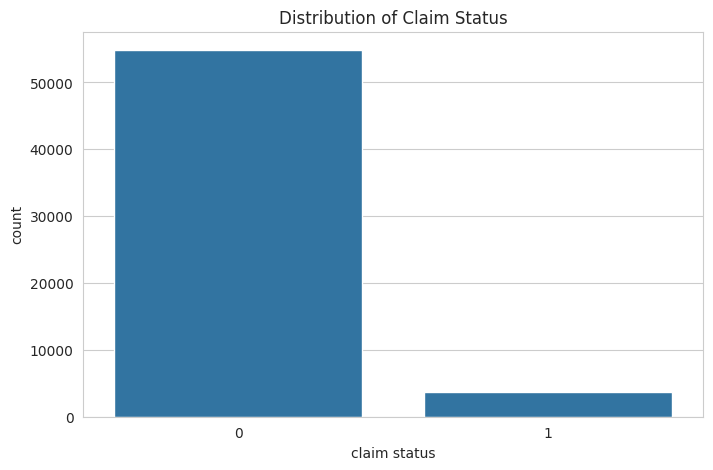

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
#plot the distribution of the target variable 'claim_status'
plt.figure(figsize=(8,5))
sns.countplot(x='claim_status',data=data)
plt.title('Distribution of Claim Status')
plt.xlabel('claim status')
plt.ylabel('count')
plt.show()

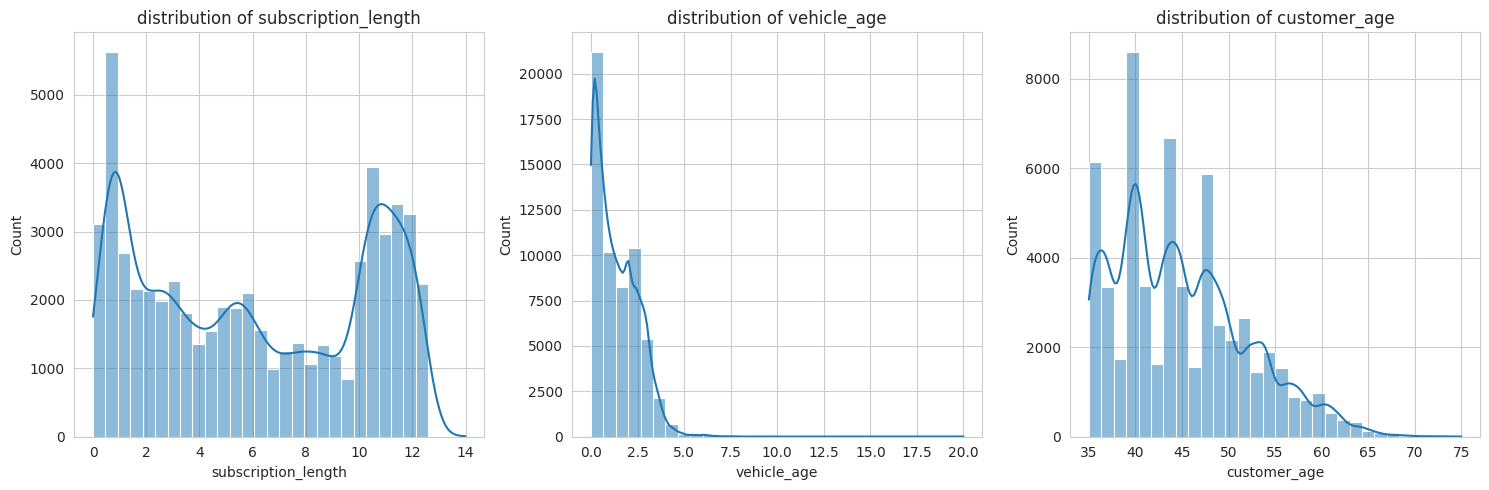

In [14]:
#selecting numerical columns for analysis
numerical_columns = ['subscription_length', 'vehicle_age','customer_age']
#plotting distributions of numerical features
plt.figure(figsize=(15,5))
for i,column in enumerate(numerical_columns):
  plt.subplot(1, 3, i+1)
  sns.histplot(data[column], bins=30, kde=True)
  plt.title(f'distribution of {column}')
plt.tight_layout()
plt.show()

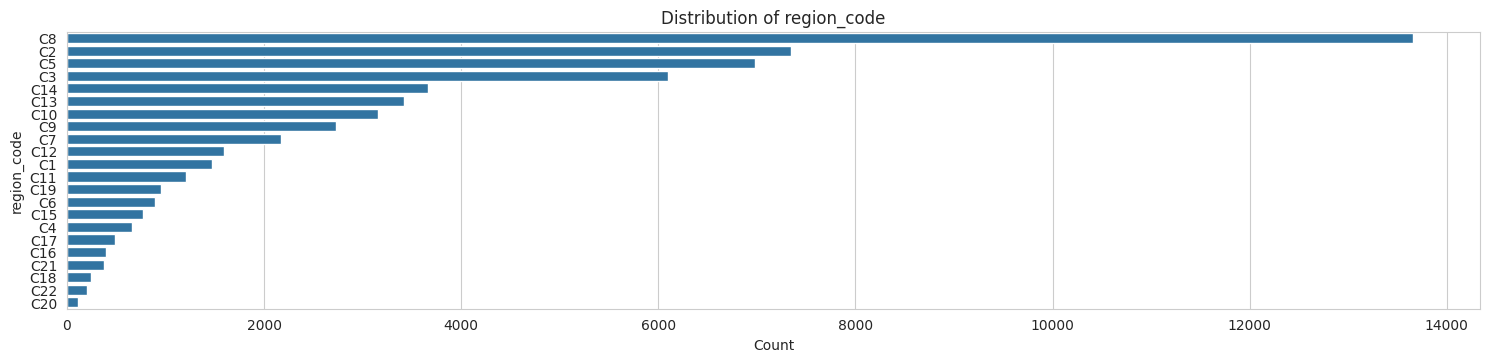

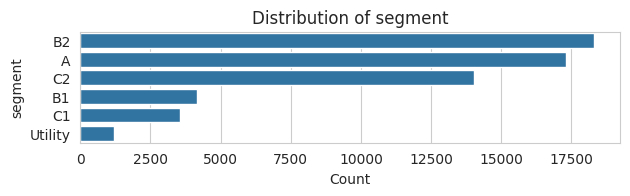

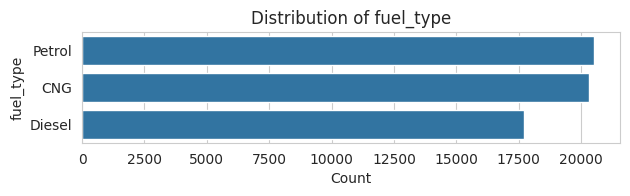

In [15]:
# selecting some relevant categorical columns for analysis
categorical_columns = ['region_code', 'segment', 'fuel_type']

# plotting distributions of categorical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    sns.countplot(y=column, data=data, order=data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

In [16]:
from sklearn.utils import resample
# separate majority and minority classes
majority = data[data.claim_status == 0]
minority = data[data.claim_status == 1]

# oversample the minority class
minority_oversampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
# combine majority class with oversampled minority class
oversampled_data = pd.concat([majority, minority_oversampled])
# check the distribution of undersampled and oversampled datasets
oversampled_distribution = oversampled_data.claim_status.value_counts()
oversampled_distribution


,count
claim_status,
0,54844
1,54844


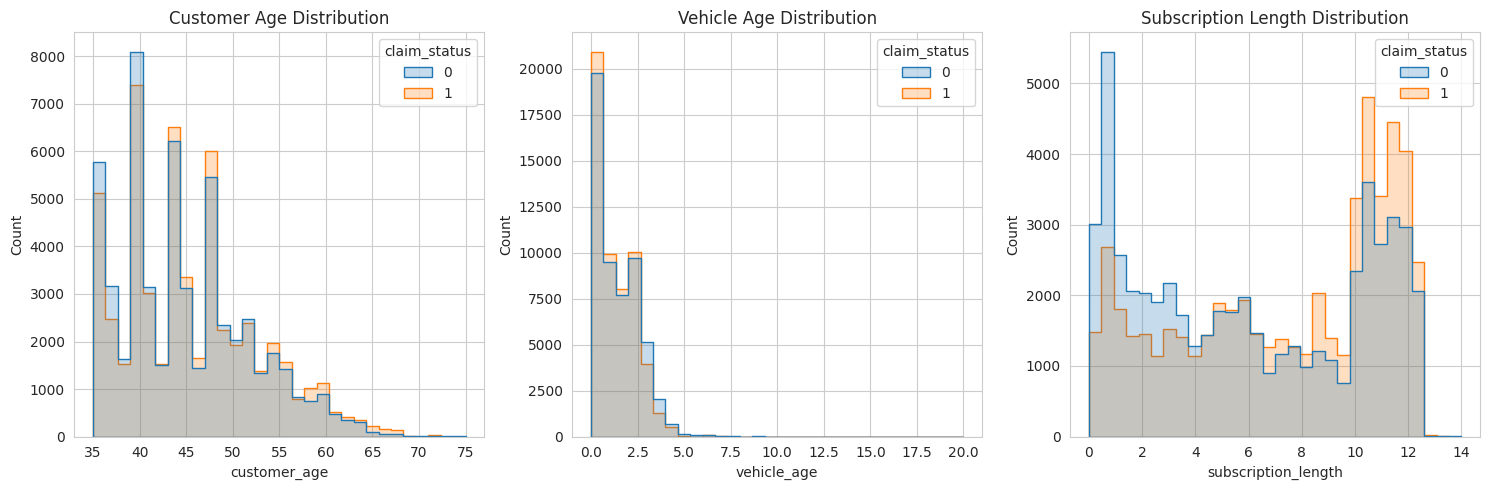

In [17]:
# plotting the distribution of 'customer_age', 'vehicle_age', and 'subscription_length' with respect to 'claim_status'
plt.figure(figsize=(15, 5))
# 'customer_age' distribution
plt.subplot(1, 3, 1)
sns.histplot(data=oversampled_data, x='customer_age', hue='claim_status', element='step', bins=30)
plt.title('Customer Age Distribution')
# 'vehicle_age' distribution
plt.subplot(1, 3, 2)
sns.histplot(data=oversampled_data, x='vehicle_age', hue='claim_status', element='step', bins=30)
plt.title('Vehicle Age Distribution')
# 'subscription_length' distribution
plt.subplot(1, 3, 3)
sns.histplot(data=oversampled_data, x='subscription_length', hue='claim_status', element='step', bins=30)
plt.title('Subscription Length Distribution')
plt.tight_layout()
plt.show()


Data loaded successfully.
   policy_id  subscription_length  vehicle_age  customer_age region_code  \
0  POL045360                  9.3          1.2            41          C8   
1  POL016745                  8.2          1.8            35          C2   
2  POL007194                  9.5          0.2            44          C8   
3  POL018146                  5.2          0.4            44         C10   
4  POL049011                 10.1          1.0            56         C13   

   region_density segment model fuel_type     max_torque  ... is_brake_assist  \
0            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
1           27003      C1    M9    Diesel  200Nm@1750rpm  ...              No   
2            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
3           73430       A    M1       CNG   60Nm@3500rpm  ...              No   
4            5410      B2    M5    Diesel  200Nm@3000rpm  ...              No   

  is_power_door_locks  is_cent

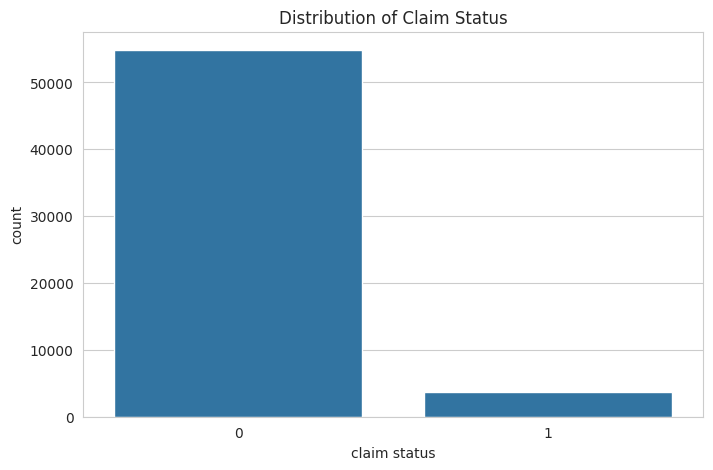

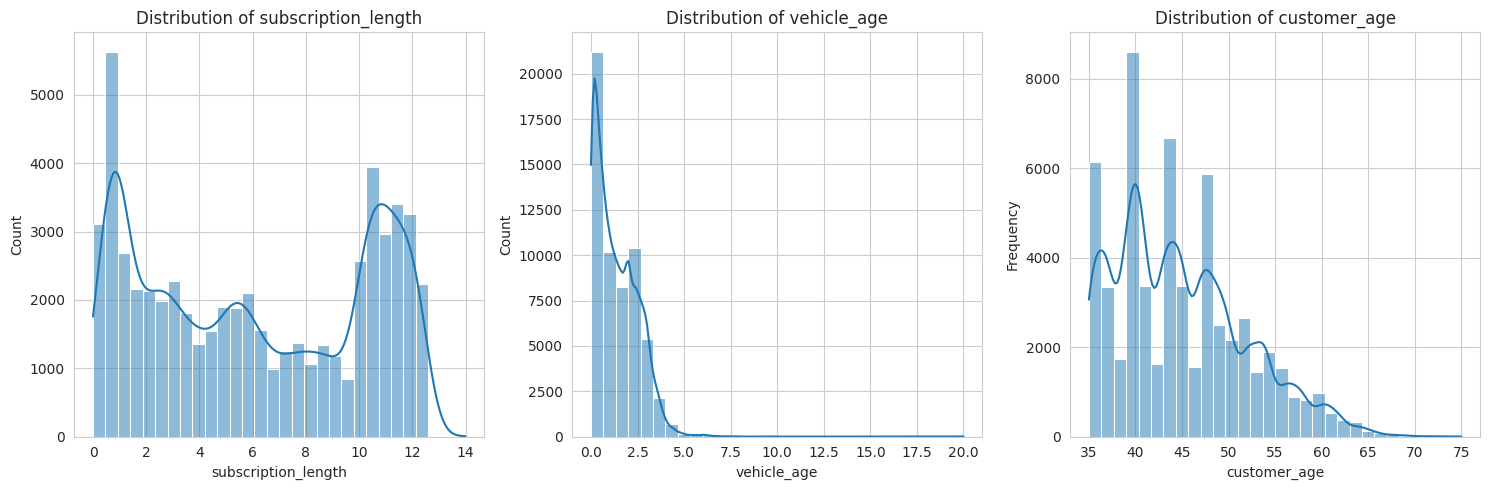

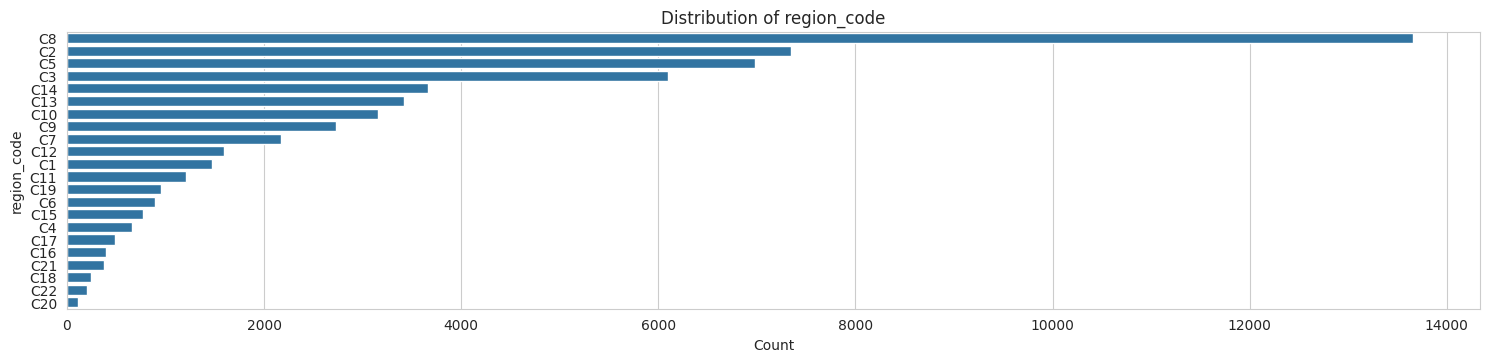

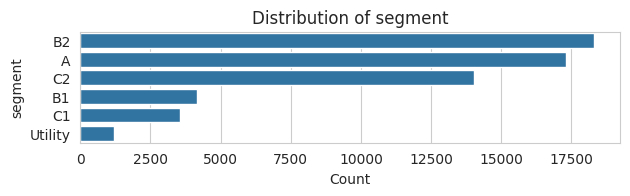

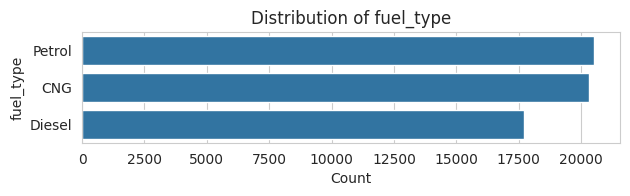


Distribution of Claim Status after Oversampling:
claim_status
0    54844
1    54844
Name: count, dtype: int64


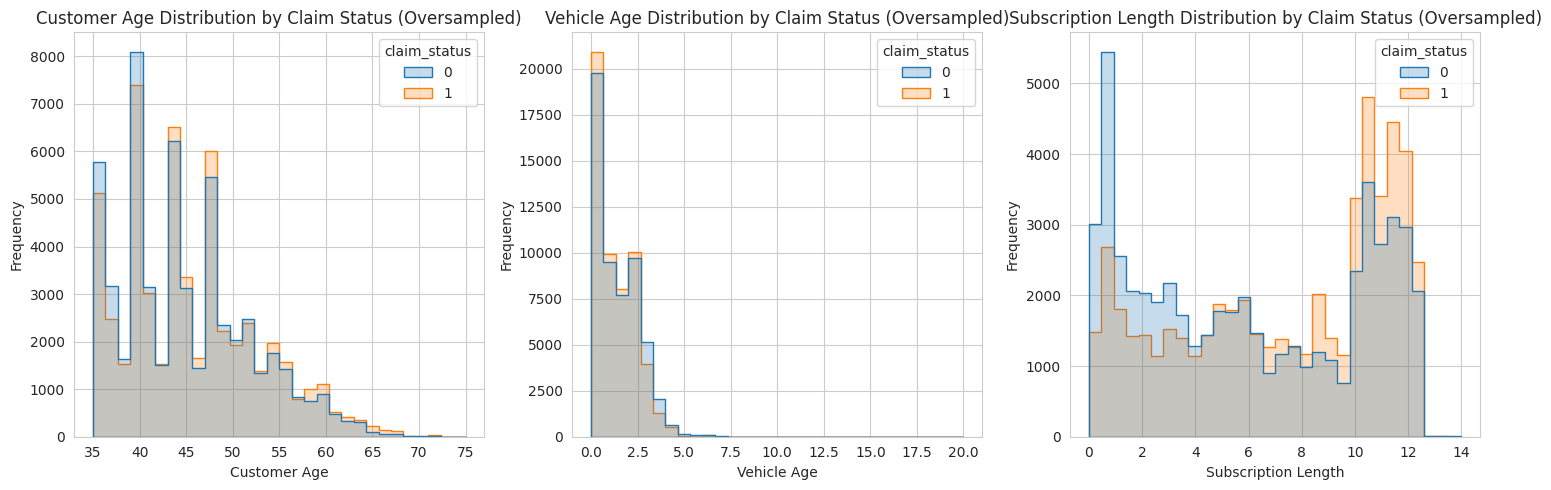


Shape of X_train: (76781, 39)
Shape of X_test: (32907, 39)
Shape of y_train: (76781,)
Shape of y_test: (32907,)

Distribution of Claim Status in y_train:
claim_status
1    0.500007
0    0.499993
Name: proportion, dtype: float64

Distribution of Claim Status in y_test:
claim_status
0    0.500015
1    0.499985
Name: proportion, dtype: float64

Training Random Forest model...
Training complete.

Classification Report on Test Set (Oversampled Data):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16454
           1       0.96      1.00      0.98     16453

    accuracy                           0.98     32907
   macro avg       0.98      0.98      0.98     32907
weighted avg       0.98      0.98      0.98     32907

Accuracy on Test Set (Oversampled Data): 0.9780

Making predictions on the original dataset...

Comparison of Actual vs. Predicted Claim Status (First 10 rows of Original Data):
   Actual  Predicted
0       0          0
1 

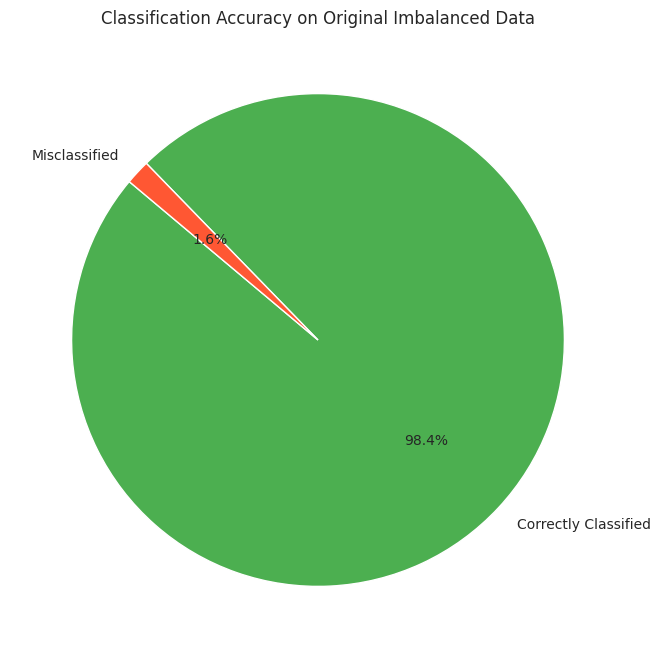


Top 10 Feature Importances (Based on Original Data):
                Feature  Importance
0   subscription_length    0.417150
2          customer_age    0.263397
1           vehicle_age    0.193724
4        region_density    0.059310
3           region_code    0.058201
6                 model    0.000672
23               length    0.000639
24                width    0.000591
22       turning_radius    0.000504
25         gross_weight    0.000491


In [18]:
from IPython import get_ipython
from IPython.display import display

# %%
import pandas as pd
# Ensure the file path is correct for your environment
try:
    data = pd.read_csv("/content/Insurance claims data.csv")
    print("Data loaded successfully.")
    print(data.head())
except FileNotFoundError:
    print("Error: 'Insurance claims data.csv' not found. Please check the file path.")
    # Exit or handle the error appropriately if the file is not found
    # For this example, we'll assume the file is found and continue.

# %%
# Display information about the DataFrame
print("\nData Info:")
data.info()

# %%
# Check for missing values
print("\nMissing Values per Column:")
print(data.isnull().sum())

# %%
import matplotlib.pyplot as plt
import seaborn as sns
# Setting a consistent style for plots
sns.set_style("whitegrid")

# plot the distribution of the target variable 'claim_status'
plt.figure(figsize=(8,5))
sns.countplot(x='claim_status',data=data)
plt.title('Distribution of Claim Status')
plt.xlabel('claim status')
plt.ylabel('count')
plt.show()

# %%
# selecting numerical columns for analysis
numerical_columns = ['subscription_length', 'vehicle_age','customer_age']

# plotting distributions of numerical features
plt.figure(figsize=(15,5))
for i,column in enumerate(numerical_columns):
  plt.subplot(1, 3, i+1)
  sns.histplot(data[column], bins=30, kde=True)
  plt.title(f'Distribution of {column}')
plt.xlabel(column) # Add x-axis label for clarity
plt.ylabel('Frequency') # Add y-axis label
plt.tight_layout()
plt.show()

# %%
# selecting some relevant categorical columns for analysis
categorical_columns = ['region_code', 'segment', 'fuel_type']

# plotting distributions of categorical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    # Use y=column for vertical bar plot, showing counts on x-axis
    sns.countplot(y=column, data=data, order=data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    # tight_layout() is called inside the loop, ensure it works as expected
    # or call it once after the loop if plotting in separate figures is not intended
    plt.tight_layout()
    plt.show() # Show plot after each categorical variable plot

# %%
from sklearn.utils import resample

# separate majority and minority classes
majority = data[data.claim_status == 0]
minority = data[data.claim_status == 1]

# oversample the minority class
# Ensure n_samples is the length of the majority class for balancing
n_samples_majority = len(majority)
minority_oversampled = resample(minority, replace=True, n_samples=n_samples_majority, random_state=42)

# combine majority class with oversampled minority class
oversampled_data = pd.concat([majority, minority_oversampled])

# check the distribution of the oversampled dataset
print("\nDistribution of Claim Status after Oversampling:")
oversampled_distribution = oversampled_data.claim_status.value_counts()
print(oversampled_distribution)


# %%
# plotting the distribution of 'customer_age', 'vehicle_age', and 'subscription_length'
# with respect to 'claim_status' in the oversampled data
plt.figure(figsize=(15, 5))

# 'customer_age' distribution
plt.subplot(1, 3, 1)
sns.histplot(data=oversampled_data, x='customer_age', hue='claim_status', element='step', bins=30)
plt.title('Customer Age Distribution by Claim Status (Oversampled)')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')

# 'vehicle_age' distribution
plt.subplot(1, 3, 2)
sns.histplot(data=oversampled_data, x='vehicle_age', hue='claim_status', element='step', bins=30)
plt.title('Vehicle Age Distribution by Claim Status (Oversampled)')
plt.xlabel('Vehicle Age')
plt.ylabel('Frequency')

# 'subscription_length' distribution
plt.subplot(1, 3, 3)
sns.histplot(data=oversampled_data, x='subscription_length', hue='claim_status', element='step', bins=30)
plt.title('Subscription Length Distribution by Claim Status (Oversampled)')
plt.xlabel('Subscription Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# %%
# This cell seems to be empty in your original prompt.

# %%
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder here as it's used

# Before proceeding, let's ensure 'policy_id' is handled.
# The original code drops 'policy_id' from oversampled_data before splitting.
# Let's apply encoding to the oversampled data first, then drop 'policy_id'
# and separate features/target.

# Make a copy to avoid modifying the original oversampled_data in place prematurely
oversampled_data_processed = oversampled_data.copy()

# Encoding categorical columns in the oversampled data
# Apply LabelEncoder to each object type column
# We need a way to handle potential new categories in test data later,
# but for training/testing on oversampled data, this is sufficient.
label_encoders = {} # Dictionary to store encoders if needed later for unseen data
for col in oversampled_data_processed.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    oversampled_data_processed[col] = label_encoders[col].fit_transform(oversampled_data_processed[col])


# drop 'policy_id' column from the processed data
# Check if 'policy_id' exists before dropping
if 'policy_id' in oversampled_data_processed.columns:
    oversampled_data_processed = oversampled_data_processed.drop('policy_id', axis=1)
else:
    print("Warning: 'policy_id' column not found in oversampled data.")


# prepare the oversampled data for modeling
X_oversampled = oversampled_data_processed.drop('claim_status', axis=1)
y_oversampled = oversampled_data_processed['claim_status']

# splitting the dataset into training and testing sets
# Use the processed and encoded data
X_train, X_test, y_train, y_test = train_test_split(
    X_oversampled, y_oversampled, test_size=0.3, random_state=42, stratify=y_oversampled) # stratify for balanced split

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nDistribution of Claim Status in y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of Claim Status in y_test:")
print(y_test.value_counts(normalize=True))


# create and train the Random Forest model
print("\nTraining Random Forest model...")
rf_model_oversampled = RandomForestClassifier(random_state=42, n_estimators=100) # Added n_estimators
rf_model_oversampled.fit(X_train, y_train)
print("Training complete.")

# predictions on the test set
y_pred = rf_model_oversampled.predict(X_test)

print("\nClassification Report on Test Set (Oversampled Data):")
print(classification_report(y_test, y_pred))

# Optionally print accuracy score as well
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set (Oversampled Data): {accuracy:.4f}")


# %%
# Now, evaluate the model trained on oversampled data on the ORIGINAL data
# We need to apply the same encoding to the original data as was applied to the training data

original_data_processed = data.copy()

# Check if 'policy_id' exists in original data before dropping
if 'policy_id' in original_data_processed.columns:
     original_data_processed = original_data_processed.drop('policy_id', axis=1)
else:
    print("Warning: 'policy_id' column not found in original data.")


# Apply the SAME LabelEncoders fitted on the oversampled data to the original data
# This is crucial to ensure consistent encoding.
for col in original_data_processed.select_dtypes(include=['object']).columns:
    if col in label_encoders:
        # Handle potential unseen categories in original data if they weren't in oversampled data
        # A robust approach might use OrdinalEncoder or handle unknowns, but LabelEncoder might raise errors
        # Here we assume categories are the same for simplicity based on the original code's approach.
        try:
             original_data_processed[col] = label_encoders[col].transform(original_data_processed[col])
        except ValueError as e:
            print(f"Error encoding column '{col}': {e}. Ensure categories match training data.")
            # You might need to implement a more robust encoding strategy if this happens.


# Prepare features from the original processed data
X_original = original_data_processed.drop('claim_status', axis=1)
y_original = original_data_processed['claim_status'] # Keep the original claim status

# Ensure columns in X_original match columns used for training
# This is important if column order or presence differs after dropping 'policy_id'
# and encoding. A simple check:
if not X_original.columns.equals(X_train.columns):
     print("Warning: Columns in original data do not match training data columns.")
     # Reindex columns if necessary to match training data order/presence
     X_original = X_original.reindex(columns=X_train.columns, fill_value=0) # Fill missing with 0 or handle appropriately


# Make predictions on the original, imbalanced data using the oversampled-trained model
print("\nMaking predictions on the original dataset...")
original_encoded_predictions = rf_model_oversampled.predict(X_original)

# Compare predictions with the actual claim status in the original data
comparison_df = pd.DataFrame({
    'Actual': y_original, # Use y_original which is the original claim status
    'Predicted': original_encoded_predictions
})

print("\nComparison of Actual vs. Predicted Claim Status (First 10 rows of Original Data):")
print(comparison_df.head(10))

# Also print classification report on the original data to see performance on imbalanced data
print("\nClassification Report on Original Imbalanced Data:")
print(classification_report(y_original, original_encoded_predictions))


# %%
# Evaluate classification accuracy on the ORIGINAL data
# Use the comparison_df created in the previous cell
correctly_classified = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
incorrectly_classified = (comparison_df['Actual'] != comparison_df['Predicted']).sum()

classification_counts = [correctly_classified, incorrectly_classified]
labels = ['Correctly Classified', 'Misclassified']

# create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(classification_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FF5733'])
plt.title('Classification Accuracy on Original Imbalanced Data') # Title reflects evaluation on original data
plt.show()

# %%
# Code from your feature importance request
# This section can be run separately if you want to analyze feature importance
# It uses the data *after* encoding but *before* oversampling for simplicity,
# as feature importance is often calculated on the original feature space.
# If you want importance based on oversampled data, you'd use X_oversampled

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder # Re-import if running this cell isolated

# encode categorical variables in the ORIGINAL data for feature importance calculation
# We re-apply encoding here, assuming you might run this cell independently.
# If run sequentially after the previous cells, original_data_processed is already encoded.
# Let's use original_data_processed for consistency if running after the previous cells.
# If running this cell first, you'd use the original 'data' variable.
# For clarity and independence, let's re-encode a copy of the original data.

data_for_importance = data.copy() # Use original data
# Ensure 'policy_id' is handled for importance calculation if it's not a useful feature
if 'policy_id' in data_for_importance.columns:
    data_for_importance = data_for_importance.drop('policy_id', axis=1)

# Apply LabelEncoder to object columns in data_for_importance
le_importance = LabelEncoder()
# Be mindful of columns already encoded in original_data_processed if running sequentially
# This loop will re-encode, which is fine if data_for_importance is a fresh copy of original data
for col in data_for_importance.select_dtypes(include=['object']).columns:
     data_for_importance[col] = le_importance.fit_transform(data_for_importance[col])


# separate features and target variable for importance calculation
X_importance = data_for_importance.drop('claim_status', axis=1)
y_importance = data_for_importance['claim_status']

# create a random forest classifier model for importance calculation
# Train on the original (but encoded) data
rf_model_importance = RandomForestClassifier(random_state=42, n_estimators=100) # Use a reasonable number of estimators
rf_model_importance.fit(X_importance, y_importance)

# get feature importance
feature_importance = rf_model_importance.feature_importances_

# create a dataframe for visualization of feature importance
features_df = pd.DataFrame({'Feature': X_importance.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

print("\nTop 10 Feature Importances (Based on Original Data):")
print(features_df.head(10))

# %%
# This cell seems to be empty in your original prompt.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# drop 'Policy_id' column from the data
oversampled_data = oversampled_data.drop('policy_id', axis=1)

# prepare the oversampled data
X_oversampled = oversampled_data.drop('claim_status', axis=1)
y_oversampled = oversampled_data['claim_status']

# encoding categorical columns
X_oversampled_encoded = X_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_oversampled_encoded, y_oversampled, test_size=0.3, random_state=42)

# create and train the Random Forest model
rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(X_train, y_train)

# predictions

y_pred = rf_model_oversampled.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16574
           1       0.96      1.00      0.98     16333

    accuracy                           0.98     32907
   macro avg       0.98      0.98      0.98     32907
weighted avg       0.98      0.98      0.98     32907



In [20]:
original_encoded = data.drop('policy_id', axis=1).copy()
encoders = {col: LabelEncoder().fit(X_oversampled[col]) for col in X_oversampled.select_dtypes(include=['object']).columns}

for col in original_encoded.select_dtypes(include=['object']).columns:
    if col in encoders:
        original_encoded[col] = encoders[col].transform(original_encoded[col])

original_encoded_predictions = rf_model_oversampled.predict(original_encoded.drop('claim_status', axis=1))

comparison_df = pd.DataFrame({
    'Actual': original_encoded['claim_status'],
    'Predicted': original_encoded_predictions
})
print(comparison_df.head(10))

   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          1
4       0          0
5       0          0
6       0          0
7       0          0
8       0          0
9       0          0


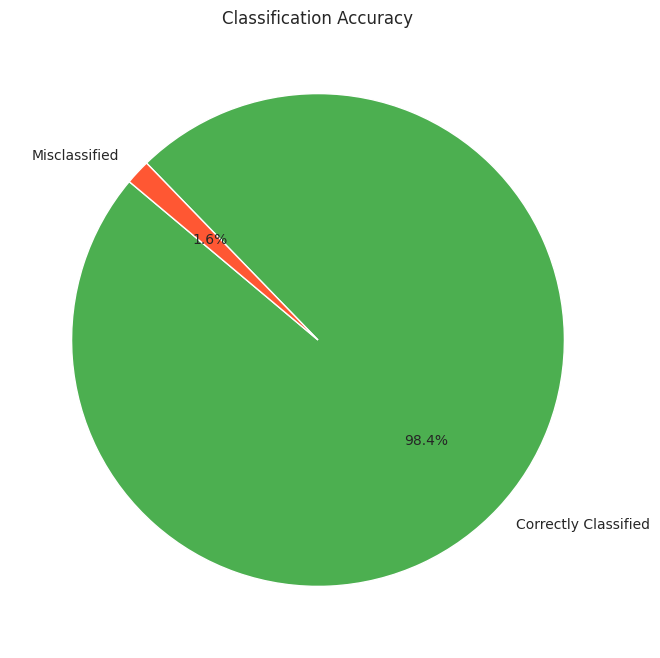

In [21]:
correctly_classified = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
incorrectly_classified = (comparison_df['Actual'] != comparison_df['Predicted']).sum()
classification_counts = [correctly_classified, incorrectly_classified]
labels = ['Correctly Classified', 'Misclassified']
# create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(classification_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FF5733'])
plt.title('Classification Accuracy')
plt.show()
